# Sales Forecasting for an E-commerce Platform
## Project Overview
In this project, you will develop a sales forecasting model for an e-commerce platform in preparation for the upcoming holiday season. The goal is to forecast future sales based on historical data, analyze the impact of promotions, and provide recommendations for inventory management.
You will be provided with several datasets containing historical sales, product details, and past promotions.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
sales_data = pd.read_csv('data/sales.csv')
products_data = pd.read_csv('data/products.csv')
promotions_data = pd.read_csv('data/holiday_promotions.csv')

# Display the first few rows of each dataset
display(sales_data.head())
display(products_data.head())
display(promotions_data.head())


,date,product_id,quantity_sold,revenue,promotion_id
0,2022-01-01,P001,3,1200.918191,NaN
1,2022-01-01,P002,4,345.796535,NaN
2,2022-01-01,P003,6,1041.103317,NaN
3,2022-01-01,P004,6,2911.534965,NaN
4,2022-01-01,P005,5,2480.918320,NaN


,product_id,category,price,cost,stock_on_hand,supplier
0,P001,Home Goods,400.306064,59.113263,121,Supplier_1
1,P002,Electronics,86.449134,51.018383,380,Supplier_3
2,P003,Toys,173.517219,47.145711,180,Supplier_2
3,P004,Electronics,485.255828,250.570579,855,Supplier_2
4,P005,Toys,496.183664,187.157045,363,Supplier_2


,promotion_id,promotion_type,start_date,end_date,discount_percentage,ad_spend
0,PR01,Flash Sale,2022-03-01,2022-03-07,0.0,3641.393572
1,PR02,Free Shipping,2022-11-11,2022-11-16,0.0,7361.716095
2,PR03,Free Shipping,2022-04-04,2022-04-07,0.0,6453.639773
3,PR04,Buy-One-Get-One,2022-12-09,2022-12-13,0.0,2042.821536
4,PR05,Free Shipping,2022-03-09,2022-03-15,0.0,3978.082224


## Data Exploration and Cleaning
Before building any models, it's important to explore and clean the data.
1. Check for missing values.
2. Handle inconsistent data types.
3. Ensure that the data points are consistent across the datasets.


In [3]:
# Check for missing values
print('Sales Data Missing Values:', sales_data.isnull().sum())
print('Products Data Missing Values:', products_data.isnull().sum())
print('Promotions Data Missing Values:', promotions_data.isnull().sum())


Sales Data Missing Values: date                 0
product_id           0
quantity_sold        0
revenue              0
promotion_id     13680
dtype: int64
Products Data Missing Values: product_id       0
category         0
price            0
cost             0
stock_on_hand    0
supplier         0
dtype: int64
Promotions Data Missing Values: promotion_id           0
promotion_type         0
start_date             0
end_date               0
discount_percentage    0
ad_spend               0
dtype: int64


## Data Merging
To analyze the impact of promotions on sales, we need to merge the datasets on common keys.
- Merge `sales_data` with `products_data` on `product_id`.
- Merge `sales_data` with `promotions_data` on `promotion_id` to incorporate promotion details.


In [4]:
# Merge sales data with product and promotion details
merged_data = pd.merge(sales_data, products_data, on='product_id', how='left')
merged_data = pd.merge(merged_data, promotions_data, on='promotion_id', how='left')

# Display the first few rows of the merged dataset
display(merged_data.head())

,date,product_id,quantity_sold,revenue,promotion_id,category,price,cost,stock_on_hand,supplier,promotion_type,start_date,end_date,discount_percentage,ad_spend
0,2022-01-01,P001,3,1200.918191,NaN,Home Goods,400.306064,59.113263,121,Supplier_1,NaN,NaN,NaN,NaN,NaN
1,2022-01-01,P002,4,345.796535,NaN,Electronics,86.449134,51.018383,380,Supplier_3,NaN,NaN,NaN,NaN,NaN
2,2022-01-01,P003,6,1041.103317,NaN,Toys,173.517219,47.145711,180,Supplier_2,NaN,NaN,NaN,NaN,NaN
3,2022-01-01,P004,6,2911.534965,NaN,Electronics,485.255828,250.570579,855,Supplier_2,NaN,NaN,NaN,NaN,NaN
4,2022-01-01,P005,5,2480.918320,NaN,Toys,496.183664,187.157045,363,Supplier_2,NaN,NaN,NaN,NaN,NaN


## Correlation Analysis
Analyze correlations between different variables, such as sales volume, product category, price, promotion type, and discount.


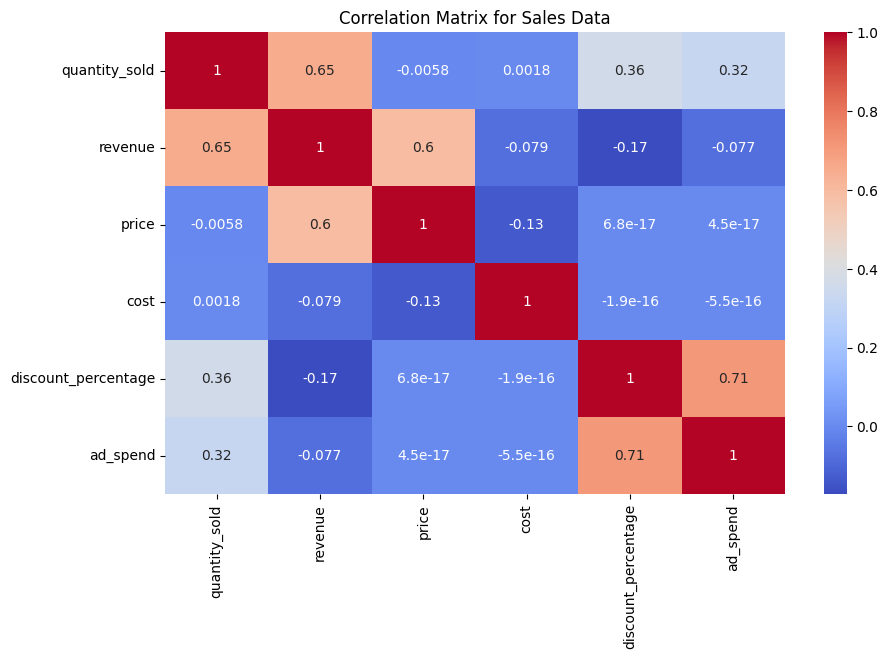

In [5]:
# Correlation analysis
numeric_cols = ['quantity_sold', 'revenue', 'price', 'cost', 'discount_percentage', 'ad_spend']
correlation_matrix = merged_data[numeric_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Sales Data')
plt.show()

## Sales Forecasting Model
Now that the data has been explored and cleaned, let's move on to building a sales forecasting model.
- Use historical sales data and features like promotions, product category, and price to predict future sales.
- Try models such as ARIMA or machine learning models like Random Forest and XGBoost for time series forecasting.


In [7]:
# Example: Time Series Forecasting using ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Aggregate sales by date
sales_by_date = sales_data.groupby('date').agg({'quantity_sold': 'sum'}).reset_index()
sales_by_date['date'] = pd.to_datetime(sales_by_date['date'])
sales_by_date.set_index('date', inplace=True)

# Fit ARIMA model
model = ARIMA(sales_by_date['quantity_sold'], order=(5, 1, 0))
arima_model = model.fit()

# Forecast sales for the next 30 days
forecast = arima_model.forecast(steps=30)
print(forecast)

c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\alexa\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2024-01-01    160.182976
2024-01-02    157.260325
2024-01-03    155.437196
2024-01-04    156.517782
2024-01-05    156.724893
2024-01-06    156.700265
2024-01-07    157.027023
2024-01-08    157.034422
2024-01-09    156.993588
2024-01-10    157.009205
2024-01-11    156.987374
2024-01-12    156.972016
2024-01-13    156.974616
2024-01-14    156.972936
2024-01-15    156.972866
2024-01-16    156.974831
2024-01-17    156.975134
2024-01-18    156.975228
2024-01-19    156.975446
2024-01-20    156.975343
2024-01-21    156.975263
2024-01-22    156.975255
2024-01-23    156.975226
2024-01-24    156.975219
2024-01-25    156.975226
2024-01-26    156.975228
2024-01-27    156.975230
2024-01-28    156.975232
2024-01-29    156.975232
2024-01-30    156.975232
Freq: D, Name: predicted_mean, dtype: float64


## Insights and Recommendations
Once the model has been built and evaluated, provide actionable insights.
- What do the sales forecasts suggest?
- How do promotions affect future sales?
- What inventory recommendations would you provide based on the forecast?
